# ECE 59500 Machine Learning: Assignment 2

# Exercise 1: Loading Data via Python

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import csv

In [18]:
male_train_data_directory = "/content/drive/MyDrive/ECE595_assignments/Assignment-2/data/male_train_data.csv"
female_train_data_directory = "/content/drive/MyDrive/ECE595_assignments/Assignment-2/data/female_train_data.csv"

def load_data(fileName):
    # Read csv file from data
    with open(fileName, "r") as csv_file:
        reader = csv.reader(csv_file, delimiter=',')
        dataList = list(reader)
    csv_file.close()
    
    # Create data list
    x_data = []
    y_data = []
    train_data = []
    for data in dataList[1:]:
        x_data.append(float(data[1]))
        y_data.append(float(data[2]))
        train_data.append((float(data[1]), float(data[2])))
    
    return x_data, y_data, train_data;

# Load the training data, change the directory according to the user
male_x, male_y, male_train_data = load_data(male_train_data_directory)
female_x, female_y, female_train_data = load_data(female_train_data_directory)


# Exercise 2: Building a Linear Classifier via Optimization

## (a)
$$
\sum_{j=1}^{N}(w^Tx_j+w_0-y_j)^2=||A\theta-b||^2
$$

## (b)
If $x_0$ is local minimum of function g, then $\nabla g(x_0)=0$ must be true. Denote $g(\theta )=||A\theta -b||^2$ and compute gradient of g

$
\nabla g(\theta )\\
=\nabla \{(A\theta -b)^T(A\theta -b)\}\\
=\nabla\{\theta ^T A^T A\theta - \theta ^T A^T b-b^T A\theta +b^T b\}\\
=2A^TA\theta -2A^Tb+0\\
$


Let $\nabla(\theta )=0$

$$
\theta ^*=(A^TA)^{-1}A^Tb\\
Ax=0→A^TAx=0
$$

$A$ full rank is equivalent to $A^TA$ full rank, which is invertible. If $A^TA$ needs to be invertible. Denoting $x_i=(x_{i,1},x_{i,2})$, there exists $x_1, x_2, x_3$ such that

$$
\begin{bmatrix}
ax_{1,1}+bx_{2,1}+cx_{3,1}\\
ax_{1,2}+bx_{2,2}+cx_{3,2}\\
a+b+c
\end{bmatrix}
=\begin{bmatrix}
0\\
0\\
0
\end{bmatrix}
↔ a=b=c=0
$$

This happen when $\begin{bmatrix}
x_{1,1}&x_{2,1}&x_{3,1}\\
x_{1,2}&x_{2,2}&x_{3,2}\\
1&1&1
\end{bmatrix}$
has trivial null space, is full rank, and has determinant $\ne 0$.

The question ask if $A^TA$ cannot be inverted. We could use **Moore-Penrose (MP)** inverse of A to solve optimization problem.

## (c), (d)

In [7]:
# Concatenate data and define A and b
X = np.concatenate((male_train_data, female_train_data), axis=0)
A = np.concatenate((X, np.ones(len(X)).reshape(len(X), 1)), axis=1)
b = np.concatenate((np.ones(len(male_train_data)), -np.ones((len(female_train_data)))), axis=0)
    
# Solve optimization (CVXPY)
theta = cp.Variable(3)
objective = cp.Minimize(cp.sum_squares(A*theta-b))
problem = cp.Problem(objective, constraints=None)
problem.solve()
opt_theta = theta.value
    
# Solve optimization (Moore-Penrose inverse)
A_mp = np.linalg.pinv(A)
opt_theta_mp = np.matmul(A_mp, b)
    
# Print difference
print("Difference between optimal theta is"+str(opt_theta_mp-opt_theta.T))


Difference between optimal theta is[-9.47159018e-16 -1.05054854e-14  1.73532300e-11]


# Exercise 3: Visualization and Testing

## (a)

### (i)

Text(0, 0.5, 'Stature (mm)')

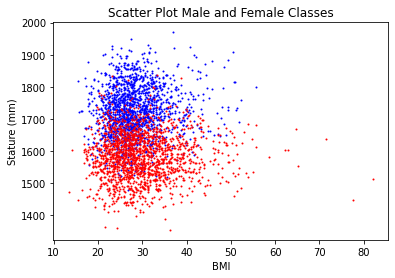

In [13]:
# Obtain separating line
x_max = max([max(male_x), max(female_x)])
x_min = min([min(male_x), min(female_x)])

# Scatter plot of male and female data
plt.figure()
plt.title("Scatter Plot Male and Female Classes")
plt.scatter(male_x, male_y, s=1, c='blue')
plt.scatter(female_x, female_y, s=1, c='red')
plt.xlabel("BMI")
plt.ylabel("Stature (mm)")

### (ii)
Explicit expression for linear decision boundary

$
\{x\in \mathbb{R}^2|g^*(x)=0\}\\
=\{x\in \mathbb{R}^2|w_1^*x_1+w_2^*x_2+w_0^*=0\}\\
=\{x\in \mathbb{R}^2|x_2=-\frac{w_1^*}{w_2^*}x_1-\frac{w_0^*}{w_2^*}\}
$

### (iii)

Text(0, 0.5, 'Stature (mm)')

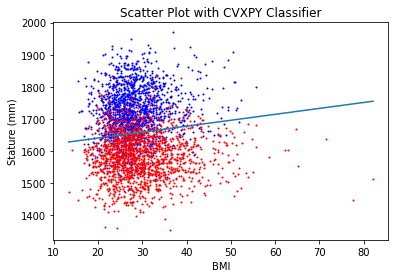

In [14]:
# Decision classifier (CVXPY)
line_x = np.linspace(x_min, x_max, 200)
line_y = -opt_theta[2] / opt_theta[1] - (opt_theta[0] / opt_theta[1]) * line_x

# Scatter plot of male and female data
plt.figure()
plt.title("Scatter Plot with CVXPY Classifier")
plt.scatter(male_x, male_y, s=1, c='blue')
plt.scatter(female_x, female_y, s=1, c='red')
plt.plot(line_x, line_y.T)
plt.xlabel("BMI")
plt.ylabel("Stature (mm)")

Text(0, 0.5, 'Stature (mm)')

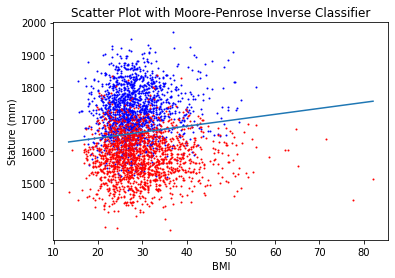

In [15]:
# Decision classifier (Moore-Penrose inverse)
line_y = -opt_theta_mp[2] / opt_theta_mp[1] - (opt_theta_mp[0] / opt_theta_mp[1]) * line_x

# Scatter plot of male and female data
plt.figure()
plt.title("Scatter Plot with Moore-Penrose Inverse Classifier")
plt.scatter(male_x, male_y, s=1, c='blue')
plt.scatter(female_x, female_y, s=1, c='red')
plt.plot(line_x, line_y.T)
plt.xlabel("BMI")
plt.ylabel("Stature (mm)")

## (b)

### (i)

In [16]:
# Load test data
_, _, male_test_data = load_data("/content/drive/MyDrive/ECE595_assignments/Assignment-2/data/male_test_data.csv")
_, _, female_test_data = load_data("/content/drive/MyDrive/ECE595_assignments/Assignment-2/data/female_test_data.csv")

### (ii)

In [17]:
# Separate data
total_count = 0
bmi_m, stature_m, bmi_f, stature_f = [], [], [], []
for i, data in enumerate(male_train_data):
    bmi_m.append(data[0])
    stature_m.append(data[1])
    total_count += 1
for i, data in enumerate(female_train_data):
    bmi_f.append(data[0])
    stature_f.append(data[1])
    total_count += 1
    
# Count male test result
A = np.concatenate((male_train_data, np.ones(len(male_train_data)).reshape(len(male_train_data), 1)), axis=1)
male_result = np.matmul(A, opt_theta)
male_count = 0
for i, result in enumerate(male_result):
    if np.sign(result) == 1:
        male_count += 1
    
# Count female test result
A = np.concatenate((female_train_data, np.ones(len(female_train_data)).reshape(len(female_train_data), 1)), axis=1)
female_result = np.matmul(A, opt_theta)
female_count = 0
for i, result in enumerate(female_result):
    if np.sign(result) == -1:
        female_count += 1
    
# Success rate
success_rate = 100 * (male_count + female_count) / total_count
print("The success rate is "+str(success_rate)+" %")

The success rate is 83.21960297766749 %


# Exercise 4: Regularization

## (a)

### (iii)

In [73]:
# Divide training data in A by 100
with open(male_train_data_directory, "r") as csv_file:
    reader = csv.reader(csv_file, delimiter=',')
    dataList = list(reader)
csv_file.close()

male_train_data = [[float(element[1]), float(element[2])/100] for element in dataList[1:]]
male_x = [row[0] for row in male_train_data]
male_y = [row[1] for row in male_train_data]

with open(female_train_data_directory, "r") as csv_file:
    reader = csv.reader(csv_file, delimiter=',')
    dataList = list(reader)
csv_file.close()

female_train_data = [[float(element[1]), float(element[2])/100] for element in dataList[1:]]
female_x = [row[0] for row in female_train_data]
female_y = [row[1] for row in female_train_data]

# Concatenate two samples
X = np.concatenate((male_train_data, female_train_data), axis=0)

# Add column of 1's to right of matrix
A = np.concatenate((X, np.reshape(np.ones(len(X)), (X.shape[0], 1))), axis=1)

# Define target vector
b = np.concatenate((np.ones(len(male_train_data)), -np.ones((len(female_train_data)))), axis=0)

# Define
theta_list = []
lambda_list = np.arange(0.1, 10, 0.1)
    
for lamb in lambda_list:
    # Solve optimization (CVXPY)
    theta = cp.Variable(3)
    objective = cp.Minimize(cp.sum_squares(A * theta - b) + lamb * cp.sum_squares(theta))
    problem = cp.Problem(objective, constraints=None)
    problem.solve()
    theta_list.append(theta.value)

In [82]:
curve_y1, curve_y2, curve_y3 = [], [], []

for theta in theta_list:
    curve_y1.append(cp.sum_squares(theta).value)
    curve_y2.append(cp.sum_squares((A * theta).T - b).value)
    curve_y3.append(cp.sum_squares((A * theta).T).value)

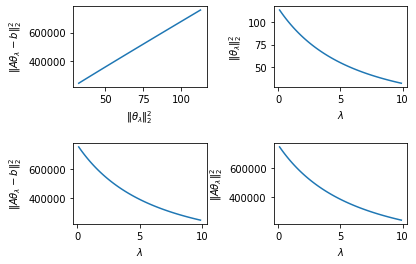

In [79]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(wspace=.5, hspace=.7)

axs[0, 0].plot(curve_y1, curve_y2)
axs[0, 0].set_xlabel(r'$\Vert \theta_{\lambda} \Vert_2^2$')
axs[0, 0].set_ylabel(r'$\Vert A \theta_{\lambda} - b \Vert_2^2$')
    
axs[0, 1].plot(lambda_list, curve_y1)
axs[0, 1].set_xlabel(r'$\lambda$')
axs[0, 1].set_ylabel(r'$\Vert \theta_{\lambda} \Vert_2^2$')
    
axs[1, 0].plot(lambda_list, curve_y2)
axs[1, 0].set_xlabel(r'$\lambda$')
axs[1, 0].set_ylabel(r'$\Vert A \theta_{\lambda} - b \Vert_2^2$')
             
axs[1, 1].plot(lambda_list, curve_y3)
axs[1, 1].set_xlabel(r'$\lambda$')
axs[1, 1].set_ylabel(r'$\Vert A \theta_{\lambda} \Vert_2^2$')

plt.show()

Text(0, 0.5, 'Stature (mm)')

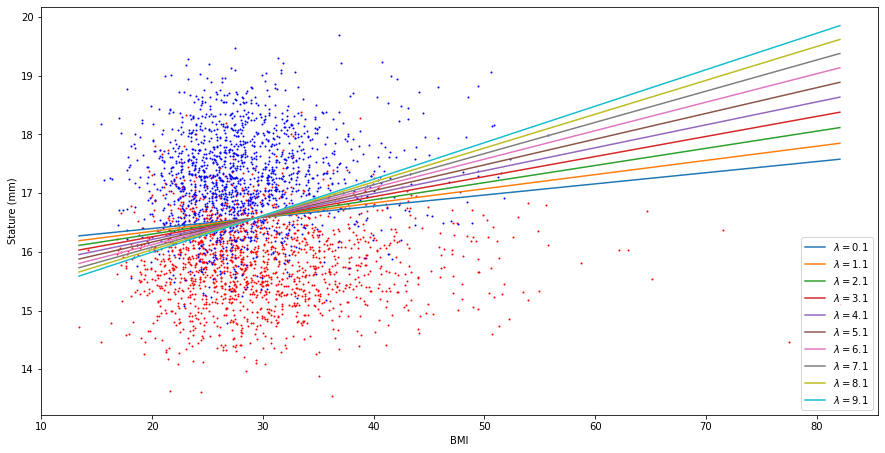

In [33]:
# Plot decision boundaries for different lambdas
x_max = max([max(male_x), max(female_x)])
x_min = min([min(male_x), min(female_x)])
line_x = np.linspace(x_min, x_max, 200)
legend_str = []
plt.figure(5, figsize=(15, 7.5))
plt.scatter(female_x, female_y, s=1, c='red')
plt.scatter(male_x, male_y, s=1, c='blue')

for i in range(len(lambda_list))[0::10]:
    line_y = -theta_list[i][2] / theta_list[i][1] - (theta_list[i][0] / theta_list[i][1] * line_x)
    plt.plot(line_x, line_y.T)
    legend_str.append('$\lambda = $' + str(lambda_list[i]))

plt.legend(legend_str)
plt.xlabel('BMI')
plt.ylabel('Stature (mm)')

### (ii)
When $\lambda$ increase, $||\theta_\lambda||_2^2$ decreases, $||A\theta_\lambda -b||_2^2$ increases. Larger $\lambda$ means needs to be penalized more in optimization by $||\theta_\lambda||_2^2$.

## (b)

### (i)
Karush-Kuhn-Tucker (KKT) for three problems.

The first optimization problem

$$
0=A^T(A\theta_\lambda-b)+\lambda\theta_\lambda
$$

The second optimization problem

$$
0=A^T(A\theta_\alpha -b)+\gamma _\alpha \theta _\alpha \\
||\theta_\alpha||_2^2-\alpha\le 0\\
\gamma_\alpha \ge 0\\
\gamma _\alpha(||\theta_\alpha||_2^2-\alpha)=0
$$

The third optimization problem

$$
0=\theta_\epsilon+\gamma_\epsilon A^T(A\theta_\epsilon -b)\\
||A\theta_\epsilon -b||_2^2-\epsilon \le 0\\
\gamma_\epsilon\ge 0\\
\gamma_\epsilon (||A\theta_\epsilon -b||_2^2-\epsilon )=0
$$

### (ii)
There exists $\theta^*$ such that $||A\theta^*-b||_2^2<||A\theta_\lambda-b||_2^2$ like the following

$$
||A\theta^*-b||_2^2+\lambda||\theta^*||_2^2\le||A\theta^*-b||_2^2+\lambda\alpha\to<||A\theta_\lambda-b||_2^2+\lambda||\theta_\lambda||_2^2
$$

contradicts optimality for unconstrianed problem. Therefore $\theta_\lambda$ is the solution to constrained minimization problem.

### (iii)
Similar to (ii). There exists $\theta^*$ such that $||\theta^*||_2^2<||\theta_\lambda||_2^2$ like the following

$$
||\theta^*||_2^2+(\frac{1}{\lambda})||A\theta^*-b||_2^2\le ||\theta^*||_2^2+(\frac{1}{\lambda})\epsilon\to<||\theta_\lambda||_2^2+(\frac{1}{\lambda})||A\theta_\lambda-b||_2^2
$$

contradicts optimality for unconstrained problem. Therefore $\theta_\lambda$is the solution to constrained minimization problem.

## (c)

In [56]:
# Divide training data in A by 100
with open(male_train_data_directory, "r") as csv_file:
    reader = csv.reader(csv_file, delimiter=',')
    dataList = list(reader)
csv_file.close()

male_train_data = [[float(element[1]), float(element[2])/100] for element in dataList[1:]]
male_x = [row[0] for row in male_train_data]
male_y = [row[1] for row in male_train_data]

with open(female_train_data_directory, "r") as csv_file:
    reader = csv.reader(csv_file, delimiter=',')
    dataList = list(reader)
csv_file.close()

female_train_data = [[float(element[1]), float(element[2])/100] for element in dataList[1:]]
female_x = [row[0] for row in female_train_data]
female_y = [row[1] for row in female_train_data]

# Concatenate two samples
X = np.concatenate((male_train_data, female_train_data), axis=0)

# Add column of 1's to right of matrix
A = np.concatenate((X, np.reshape(np.ones(len(X)), (X.shape[0], 1))), axis=1)

# Define target vector
b = np.concatenate((np.ones(len(male_train_data)), -np.ones((len(female_train_data)))), axis=0)

In [57]:
# Set lambda to 0.1 for unconstrained problem
lamb = 0.1
theta = cp.Variable(3)
objective = cp.Minimize(cp.sum_squares(A * theta - b) + lamb * cp.sum_squares(theta))
problem = cp.Problem(objective, constraints=None)
problem.solve()
theta_unconstrained = theta.value
print('Optimal unconstrained theta: ' + str(theta_unconstrained))

Optimal unconstrained theta: [ -0.01258685   0.66221011 -10.60704187]


In [63]:
theta_constrained_list = []

# Upper bound for constraint term
alpha = cp.sum_squares(theta_unconstrained).value

for alp in np.arange(alpha - 2 * 50, alpha + 2 * 50, 2):
    # Solve optimization (CVXPY)
    theta = cp.Variable(3)
    objective2 = cp.Minimize(0.1 * cp.sum_squares(A * theta - b))
    problem = cp.Problem(objective2, [cp.sum_squares(theta)<=alp])
    problem.solve()
    theta_constrained_list.append(theta.value)

[array(12.94801782), array(14.94801783), array(16.94801782), array(18.94801783), array(20.94801781), array(22.9480178), array(24.9480178), array(26.94801572), array(28.94801782), array(30.94801782), array(32.94801782), array(34.94801666), array(36.9479144), array(38.94801772), array(40.94801724), array(42.94793876), array(44.94793155), array(46.9479269), array(48.94801724), array(50.94801772), array(52.9480178), array(54.94801797), array(56.94801787), array(58.94801778), array(60.94801762), array(62.94801757), array(64.94801787), array(66.94801747), array(68.94801786), array(70.94801731), array(72.9480174), array(74.94801745), array(76.94801846), array(78.94801868), array(80.94801727), array(82.9480171), array(84.94801741), array(86.94801767), array(88.94801789), array(90.94801743), array(92.94801758), array(94.94801681), array(96.94801659), array(98.94801807), array(100.94801696), array(102.94801656), array(104.94801742), array(106.94801743), array(108.94801781), array(110.94801847), 

Text(0, 0.5, '$\\Vert A \\theta_{\\alpha} - b \\Vert_2^2$')

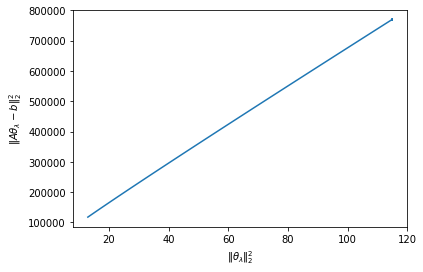

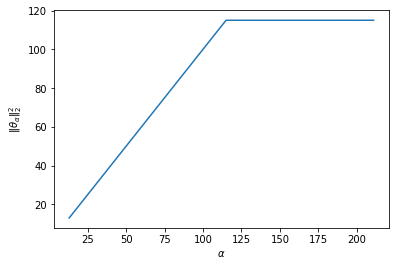

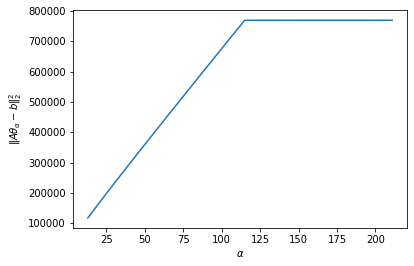

In [65]:
curve_y1, curve_y2, curve_y3 = [], [], []

for theta in theta_constrained_list:
    curve_y1.append(cp.sum_squares(theta).value)
    curve_y2.append(cp.sum_squares((A * theta).T - b).value)
    curve_y3.append(cp.sum_squares((A * theta).T).value)

print(curve_y1)

plt.figure(1)
plt.plot(curve_y1, curve_y2)
plt.xlabel(r'$\Vert \theta_{\lambda} \Vert_2^2$')
plt.ylabel(r'$\Vert A \theta_{\lambda} - b \Vert_2^2$')

plt.figure(2)
plt.plot(np.arange(alpha - 2 * 50, alpha + 2 * 50, 2), curve_y1)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\Vert \theta_{\alpha} \Vert_2^2$')

plt.figure(3)
plt.plot(np.arange(alpha - 2 * 50, alpha + 2 * 50, 2), curve_y2)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\Vert A \theta_{\alpha} - b \Vert_2^2$')

In [54]:
theta_constrained_list2 = []

# Upper bound for constraint term, second max norm
epsilon = cp.sum_squares((A * theta_unconstrained).T - b).value
print('Epsilon: ' + str(epsilon))

for eps in np.arange(epsilon, epsilon + 2 * 100, 2):
    # Solve optimization (CVXPY)
    theta = cp.Variable(3)
    objective3 = cp.Minimize(cp.sum_squares(theta))
    constraint = [cp.sum_squares(A * theta - b) <= eps]
    problem = cp.Problem(objective3, constraints=constraint)
    problem.solve()
    theta_constrained_list2.append(theta.value)

Epsilon: 757234.971591082


Text(0, 0.5, '$\\Vert A \\theta_{\\epsilon} - b \\Vert_2^2$')

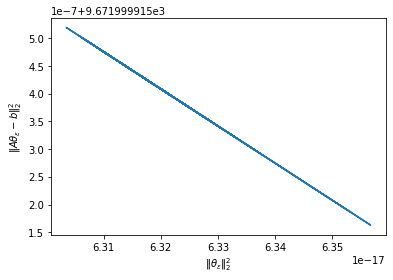

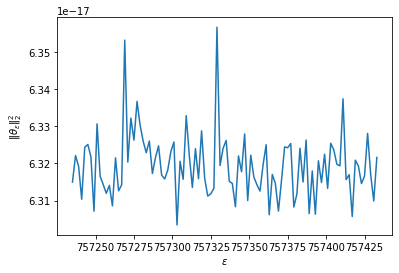

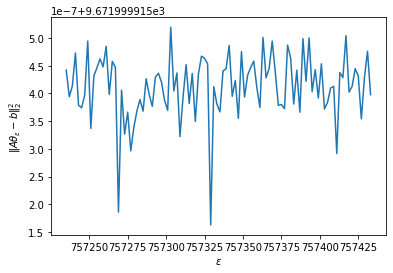

In [55]:
curve_y1, curve_y2, curve_y3 = [], [], []

for theta in theta_constrained_list2:
    curve_y1.append(cp.sum_squares(theta).value)
    curve_y2.append(cp.sum_squares((A * theta).T - b).value)
    curve_y3.append(cp.sum_squares((A * theta).T).value)

plt.figure(1)
plt.plot(curve_y1, curve_y2)
plt.xlabel(r'$\Vert \theta_{\epsilon} \Vert_2^2$')
plt.ylabel(r'$\Vert A \theta_{\epsilon} - b \Vert_2^2$')

plt.figure(2)
plt.plot(np.arange(epsilon, epsilon + 2 * 100, 2), curve_y1)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\Vert \theta_{\epsilon} \Vert_2^2$')

plt.figure(3)
plt.plot(np.arange(epsilon, epsilon + 2 * 100, 2), curve_y2)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\Vert A \theta_{\epsilon} - b \Vert_2^2$')